In [51]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import seaborn as sns
import os
from collections import Counter
import sklearn
from sklearn.decomposition import PCA
from sklearn import metrics, preprocessing, neighbors, cluster
from sklearn import cluster
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])
%matplotlib inline
pd.set_option('display.max_columns', None)

In [52]:
df = pd.read_csv("FinalDF.csv")
df

,Player,Overall Score,Potential Score,Market Value,Weekly Salary,Height,Weight,Age,Preferred Foot,id,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup,year
0,Lionel Messi,94,97,78000000.0,450000.0,169,67,27,1,2097,38,3374,43,35.891764,18,17.611956,187,95,4,0,38,31.432098,54.753610,19.756724,2014
1,Cristiano Ronaldo,92,92,55500000.0,325000.0,185,80,29,0,2371,35,3103,48,39.308761,16,13.600642,225,76,5,1,38,30.389686,43.608020,7.520237,2014
2,Robin van Persie,89,89,30000000.0,240000.0,187,71,31,1,4387,27,2126,10,11.603472,2,2.986052,76,27,5,0,9,10.081134,12.917514,1.688729,2014
3,Sergio Agüero,88,90,42000000.0,190000.0,172,74,26,0,619,33,2551,26,25.270160,8,5.568922,148,33,4,0,21,20.703184,27.805155,6.878173,2014
4,Bastian Schweinsteiger,88,88,27500000.0,180000.0,183,79,30,0,907,20,1361,5,2.174514,4,2.219083,29,31,4,0,5,2.174514,7.016763,4.264381,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11202,Matthieu Udol,68,75,1100000.0,5900.0,178,68,24,1,5745,10,797,0,0.063979,1,1.524224,3,10,1,1,0,0.063979,2.182267,0.692643,2020
11203,Felix Passlack,68,78,1400000.0,17000.0,170,74,22,0,2663,6,343,1,0.510328,0,0.240143,5,3,0,0,1,0.510328,1.801331,1.050860,2020
11204,Andrea Favilli,68,78,1500000.0,6500.0,191,78,23,1,1997,7,267,2,1.872083,0,0.112031,13,2,1,0,2,1.872083,2.520636,0.638041,2020
11205,Hidde ter Avest,68,76,1200000.0,5300.0,182,78,23,0,7000,6,348,0,0.000000,0,0.000000,0,0,0,0,0,0.000000,1.647105,1.647105,2020


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C65FA857C0>,
      dtype=object)

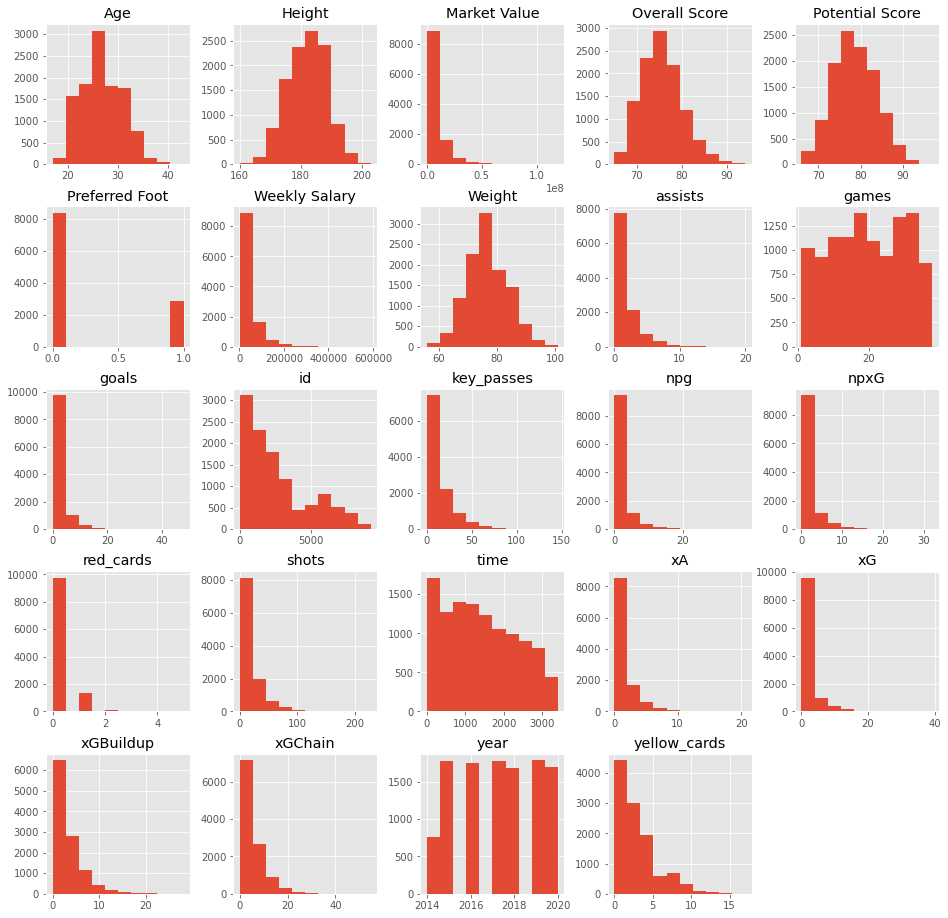

In [60]:
df2 = df.drop("Player", axis=1)
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(df2)
df2.hist(figsize = (16,16))

Text(0, 0.5, 'Number of players')

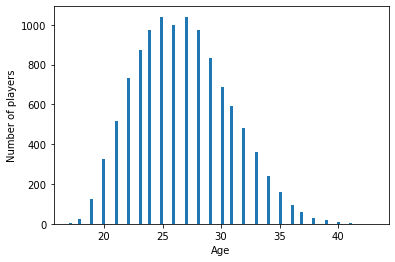

In [47]:
plt.hist(df.Age, bins=100)
plt.xlabel("Age")
plt.ylabel("Number of players")

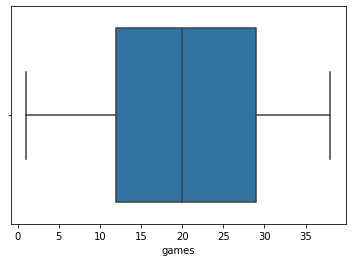

In [48]:
sns.boxplot(df["games"])
pd.options.mode.chained_assignment = None

0      Right Preferred Foot
1       Left Preferred Foot


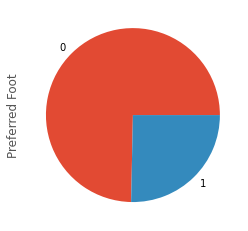

In [61]:
df['Preferred Foot'].value_counts().plot(kind='pie')
print("0      Right Preferred Foot")
print("1       Left Preferred Foot")

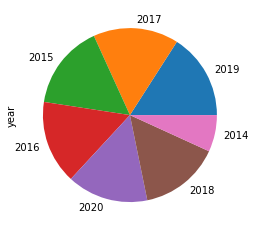

In [49]:
df["year"].value_counts().plot(kind='pie')

In [11]:
df['Market Value'] = df['Market Value']/100

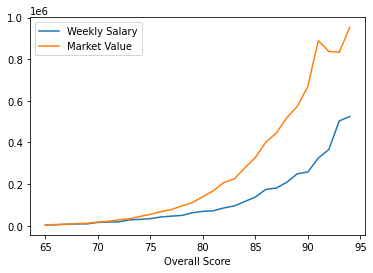

In [12]:
data=df.groupby(['Overall Score']).mean()[['Weekly Salary', 'Market Value']]
data.plot()

In [13]:
df['Market Value'] = df['Market Value']*100

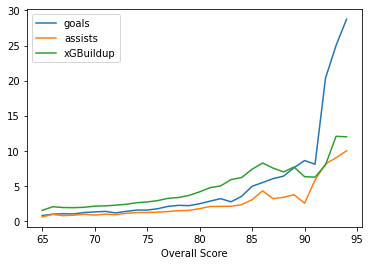

In [14]:
data=df.groupby(['Overall Score']).mean()[['goals','assists','xGBuildup']]
data.plot()

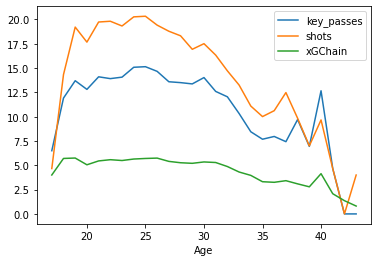

In [15]:
data=df.groupby(['Age']).mean()[['key_passes', 'shots', 'xGChain']]
data.plot()

Text(0, 0.5, 'Overall Score Mean')

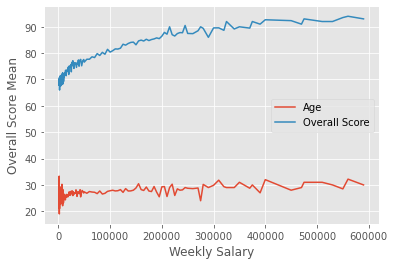

In [68]:
df.groupby('Weekly Salary').Age.mean()
data = df.groupby(['Weekly Salary']).mean()[['Age', 'Overall Score']].plot(kind='line')  #kind=line is used in order to obtain a line plot
plt.ylabel('Overall Score Mean')

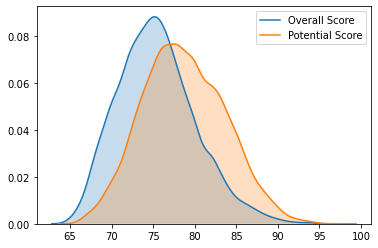

In [16]:
ax = sns.kdeplot(df["Overall Score"], shade=True)
sns.kdeplot(df["Potential Score"], shade=True)

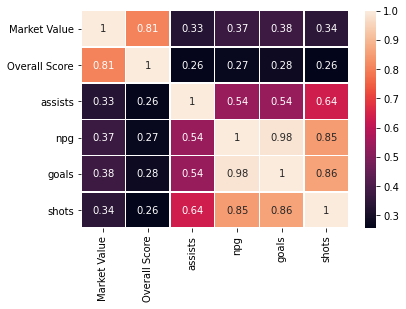

In [17]:
data2 = pd.DataFrame(df, columns = ['Market Value', 'Overall Score', 'assists', 'npg', 'goals', 'shots'])
sns.heatmap(data2.corr(), annot=True, linewidth=0.5)

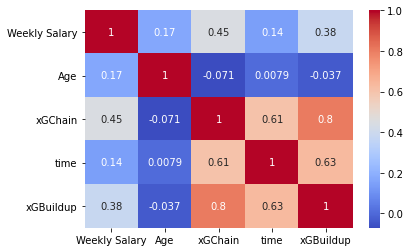

In [18]:
data3 = pd.DataFrame(df, columns = ['Weekly Salary', 'Age', 'xGChain', 'time', 'xGBuildup'])
sns.heatmap(data3.corr(), annot=True, cmap='coolwarm')

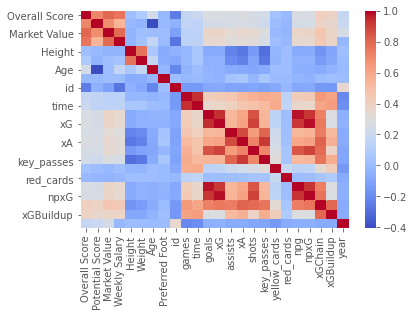

In [65]:
GoalsPerMin = df1.goals / df1.time
df1['GoalsPerMin'] = GoalsPerMin
sns.heatmap(df.corr(), cmap='coolwarm')


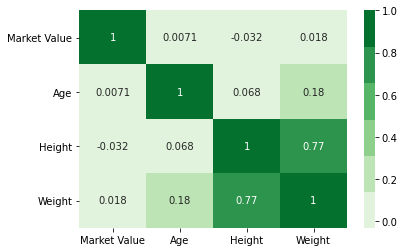

In [19]:
colormap = sns.color_palette("Greens") 
data4 = pd.DataFrame(df, columns = ['Market Value', 'Age', 'Height', 'Weight'])
sns.heatmap(data4.corr(), annot=True, cmap=colormap)

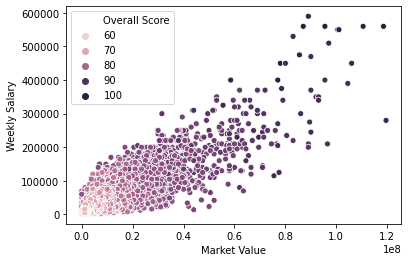

In [20]:
sns.scatterplot(data=df, x="Market Value", y="Weekly Salary", hue="Overall Score")

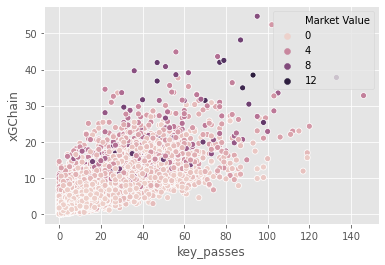

In [71]:
sns.scatterplot(data=df, x="key_passes", y="xGChain", hue="Market Value")


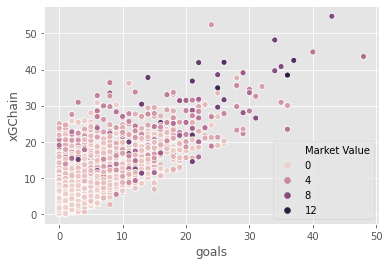

In [72]:
sns.scatterplot(data=df, x="goals", y="xGChain", hue="Market Value")


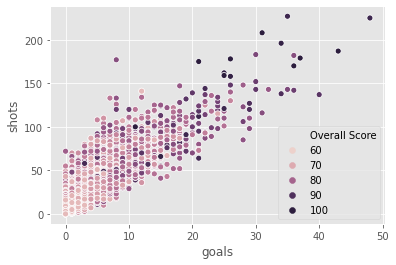

In [62]:
sns.scatterplot(data=df, x="goals", y="shots", hue="Overall Score")

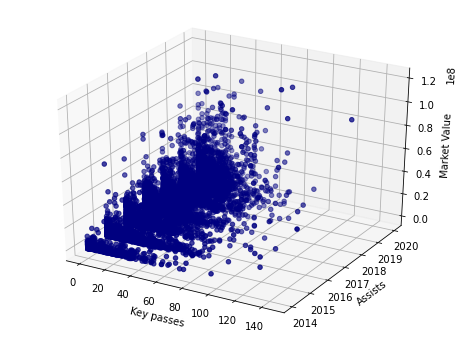

In [21]:
from mpl_toolkits.mplot3d import Axes3D # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,6)) 
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['key_passes'], df['year'], df['Market Value'] , c='navy')

ax.set_xlabel('Key passes') 
ax.set_ylabel('Assists') 
ax.set_zlabel('Market Value')

plt.show()


In [63]:
df[['Weekly Salary', 'time', 'goals']].corr()


,Weekly Salary,time,goals
Weekly Salary,1.000000,0.144049,0.350158
time,0.144049,1.000000,0.357969
goals,0.350158,0.357969,1.000000


In [64]:
df[['goals', 'xG']].corr()

,goals,xG
goals,1.000000,0.943929
xG,0.943929,1.000000


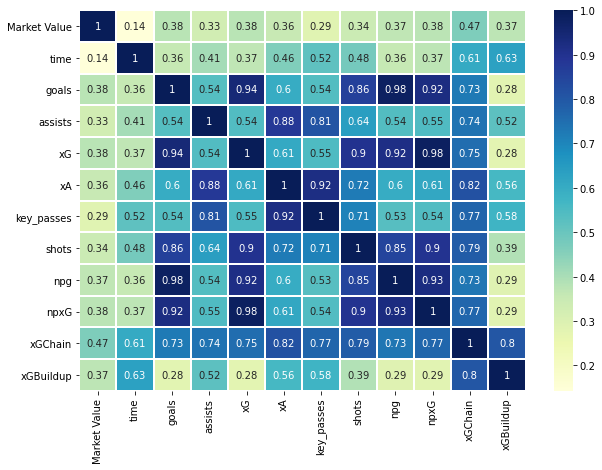

In [42]:
fig, ax = plt.subplots(figsize=(10,7))  
data3 = pd.DataFrame(df, columns = ['Market Value', 'time', 'goals', 'assists', 'xG', 'xA', 'key_passes', 'shots', 'npg', 'npxG', 'xGChain', 'xGBuildup'])
sns.heatmap(data3.corr(), annot=True, cmap='YlGnBu', linewidths=1)